<a href="https://colab.research.google.com/github/AlexaDestroyer/Analise_de_dados/blob/main/Modelos_de_Regress%C3%A3oFundamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A regressão Linear é um metodo de Aprendizado de Máquina supervisionado utilizado para realizar predição de variáveis numéricas.  

Modelo Estatístico que faz a relação linear entre duas ou mais variáveis, sendo uma variavel dependente (Alvo 🎯) e as outras independentes. Esta relação linear basicamente signica que quando uma ou mais variaveis independentes aumentam ou diminuem a variavel dependente acompanha diminuindo ou aumentando.

Obs: por ser aprendizado supervisionado é obrigatorio a definiçao da variavel dependente ou alvo pois ela representa a classe ou resultado que queremos prever.


O calculo dos coeficientes da Regressão Linear utiliza dois métodos:  

MMQ - Método dos Mínimos Quadrados

MQO - Método dos Quadrados Ordinários.

Esses métodos vão buscar o melhor valor que os coeficiente possam atingir, através da diferença do valor Predito pela função valor real.




**Case:** Prevendo valores de imóveis 📈

Este dataset que contém algumas características sobre imóveis, tais como area, andar, suites, vista, e entre outros atributos.


**Atributos:**

*  Ordem: Coluna de ID
*  Valor: Valor do imóvel
*  Area: Tamanho da área do imóvel
*  IA: Idade do imóvel
*  Andar: Quantidade de andares
*  Suites: Quantidade de suítes
*  Vista: Se o imóvel possúi uma boa vista ou não
*  DistBM: Distancia do Imovel do Mar.
*  SemRuido: Se o imóvel é localizado em uma região calma ou não.
*  AV100m: DistPróximo à área verde

**Objetivo:** encontrar uma forma de criar um algortimo preditivo que utilize essas características para predizer o valor do imóvel.

In [3]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

#Carregando o dataset
df = pd.read_csv('/content/Valorizacao_Ambiental.csv', sep =';')

In [4]:
#Visualizando alguns dados
df.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m
0,1,160000,168,1,5,1,1,294,1,0
1,2,67000,129,1,6,0,0,1505,1,0
2,3,190000,218,1,8,1,0,251,0,1
3,4,110000,180,12,4,1,0,245,0,0
4,5,70000,120,15,3,1,0,956,1,0


In [5]:
#Analisando quantidades de linhas e colunas
df.shape

(172, 10)

In [6]:
#Analisando informações gerais da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Ordem     172 non-null    int64
 1   Valor     172 non-null    int64
 2   Area      172 non-null    int64
 3   IA        172 non-null    int64
 4   Andar     172 non-null    int64
 5   Suites    172 non-null    int64
 6   Vista     172 non-null    int64
 7   DistBM    172 non-null    int64
 8   Semruido  172 non-null    int64
 9   AV100m    172 non-null    int64
dtypes: int64(10)
memory usage: 13.6 KB


In [7]:
#Analisando presença de valores nulos na base
df.isnull().sum()

Ordem       0
Valor       0
Area        0
IA          0
Andar       0
Suites      0
Vista       0
DistBM      0
Semruido    0
AV100m      0
dtype: int64

In [8]:
#Analisando presença de valores duplicados na base
df.duplicated().sum()

0

In [9]:
#Descritivo das variáveis: resumo estatistico
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Ordem,172.0,86.50,49.80,1.0,43.75,86.5,129.25,172.0
Valor,172.0,173541.95,99827.09,40000.0,104750.00,149000.0,209250.00,579840.0
Area,172.0,163.20,65.92,69.0,117.00,145.0,182.00,393.0
IA,172.0,5.65,5.57,1.0,1.00,2.5,11.00,19.0
Andar,172.0,4.30,2.24,1.0,2.75,4.0,6.00,12.0
Suites,172.0,1.40,1.13,0.0,1.00,1.0,2.00,6.0
Vista,172.0,0.14,0.35,0.0,0.00,0.0,0.00,1.0
DistBM,172.0,505.89,395.05,73.0,214.75,402.5,638.00,1859.0
Semruido,172.0,0.58,0.49,0.0,0.00,1.0,1.00,1.0
AV100m,172.0,0.35,0.48,0.0,0.00,0.0,1.00,1.0


🎯 **Variavel Alvo** ou Dependente (Target) é a variavel que queremos prever. É o resultado a ser buscado.

Text(0.5, 1.0, 'Histograma da Variável Valor')

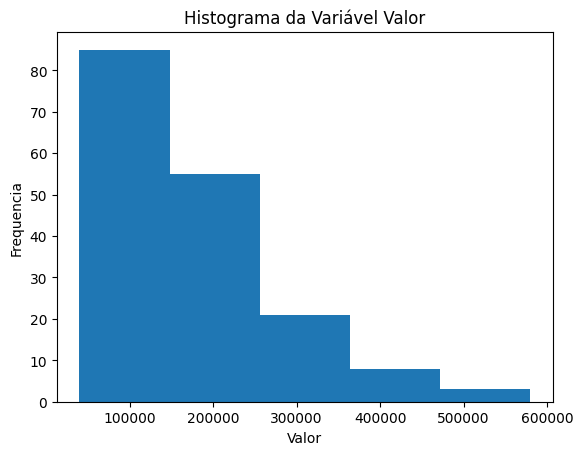

In [10]:
#identificando Varável TARGET
# Histograma para verificar a distribuição dos dados
plt.hist(df ['Valor'],bins=5)

plt.ylabel ('Frequencia')
plt.xlabel ('Valor')

plt.title ('Histograma da Variável Valor')

**Transformando o formato da variável principal para raiz quadrada. R²**

Visualizar dados no formato da raiz quadrada pode ser uma boa opção. Essa  transformação pode ajudar a mostrar a relação proporcional entre diferentes quantidades de uma maneira mais clara e intuitiva.

Utilizando a transformação da escala em raiz quadrada, o valor será ajustada de forma que os **valores menores sejam ampliados em relação aos valores maiores.**

In [11]:
#Criando uma nova coluna utilizando Numpy para criar raiz quadrada da coluna [Valor]
df["raiz_valor"] =np.sqrt(df['Valor'])

In [12]:
df.head(10)

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131
5,6,75000,160,18,2,0,1,85,0,1,273.861279
6,7,95000,155,5,3,1,0,1401,1,0,308.220700
7,8,135000,165,1,2,1,1,148,0,1,367.423461
8,9,110000,150,10,4,1,0,143,0,0,331.662479
9,10,115000,185,15,5,1,0,831,0,0,339.116499


Text(0.5, 1.0, 'Histograma da variável valor após raiz quadrada')

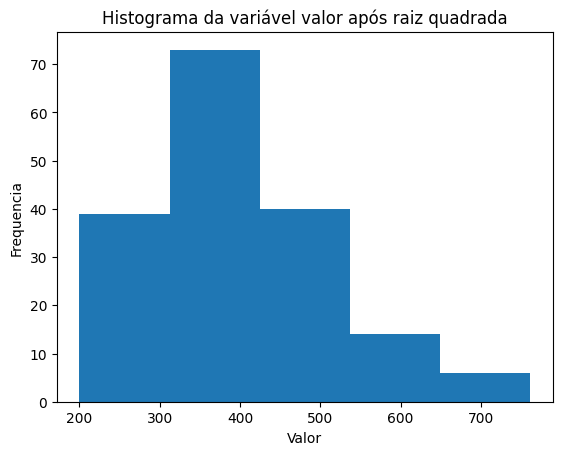

In [13]:
plt.hist(df ['raiz_valor'], bins=5)

plt.ylabel ('Frequencia')
plt.xlabel ('Valor')

plt.title ('Histograma da variável valor após raiz quadrada')

**Analisando as variáveis quantitativas**


Analisando a possibilidades de outliers ou valores extremos.
ao avaliar os outliers e valores extremos é preciso ter muito critério ao analisá-los. A análise de dados considera os outliers como uma parte importante do processo analítico. É essencial abordá-los com cuidado, utilizando métodos estatísticos apropriados e levando em consideração o contexto dos dados. O tratamento adequado dos outliers pode levar a insights valiosos e a uma análise mais precisa e confiável.

Text(0, 0.5, 'Qtd de Suites')

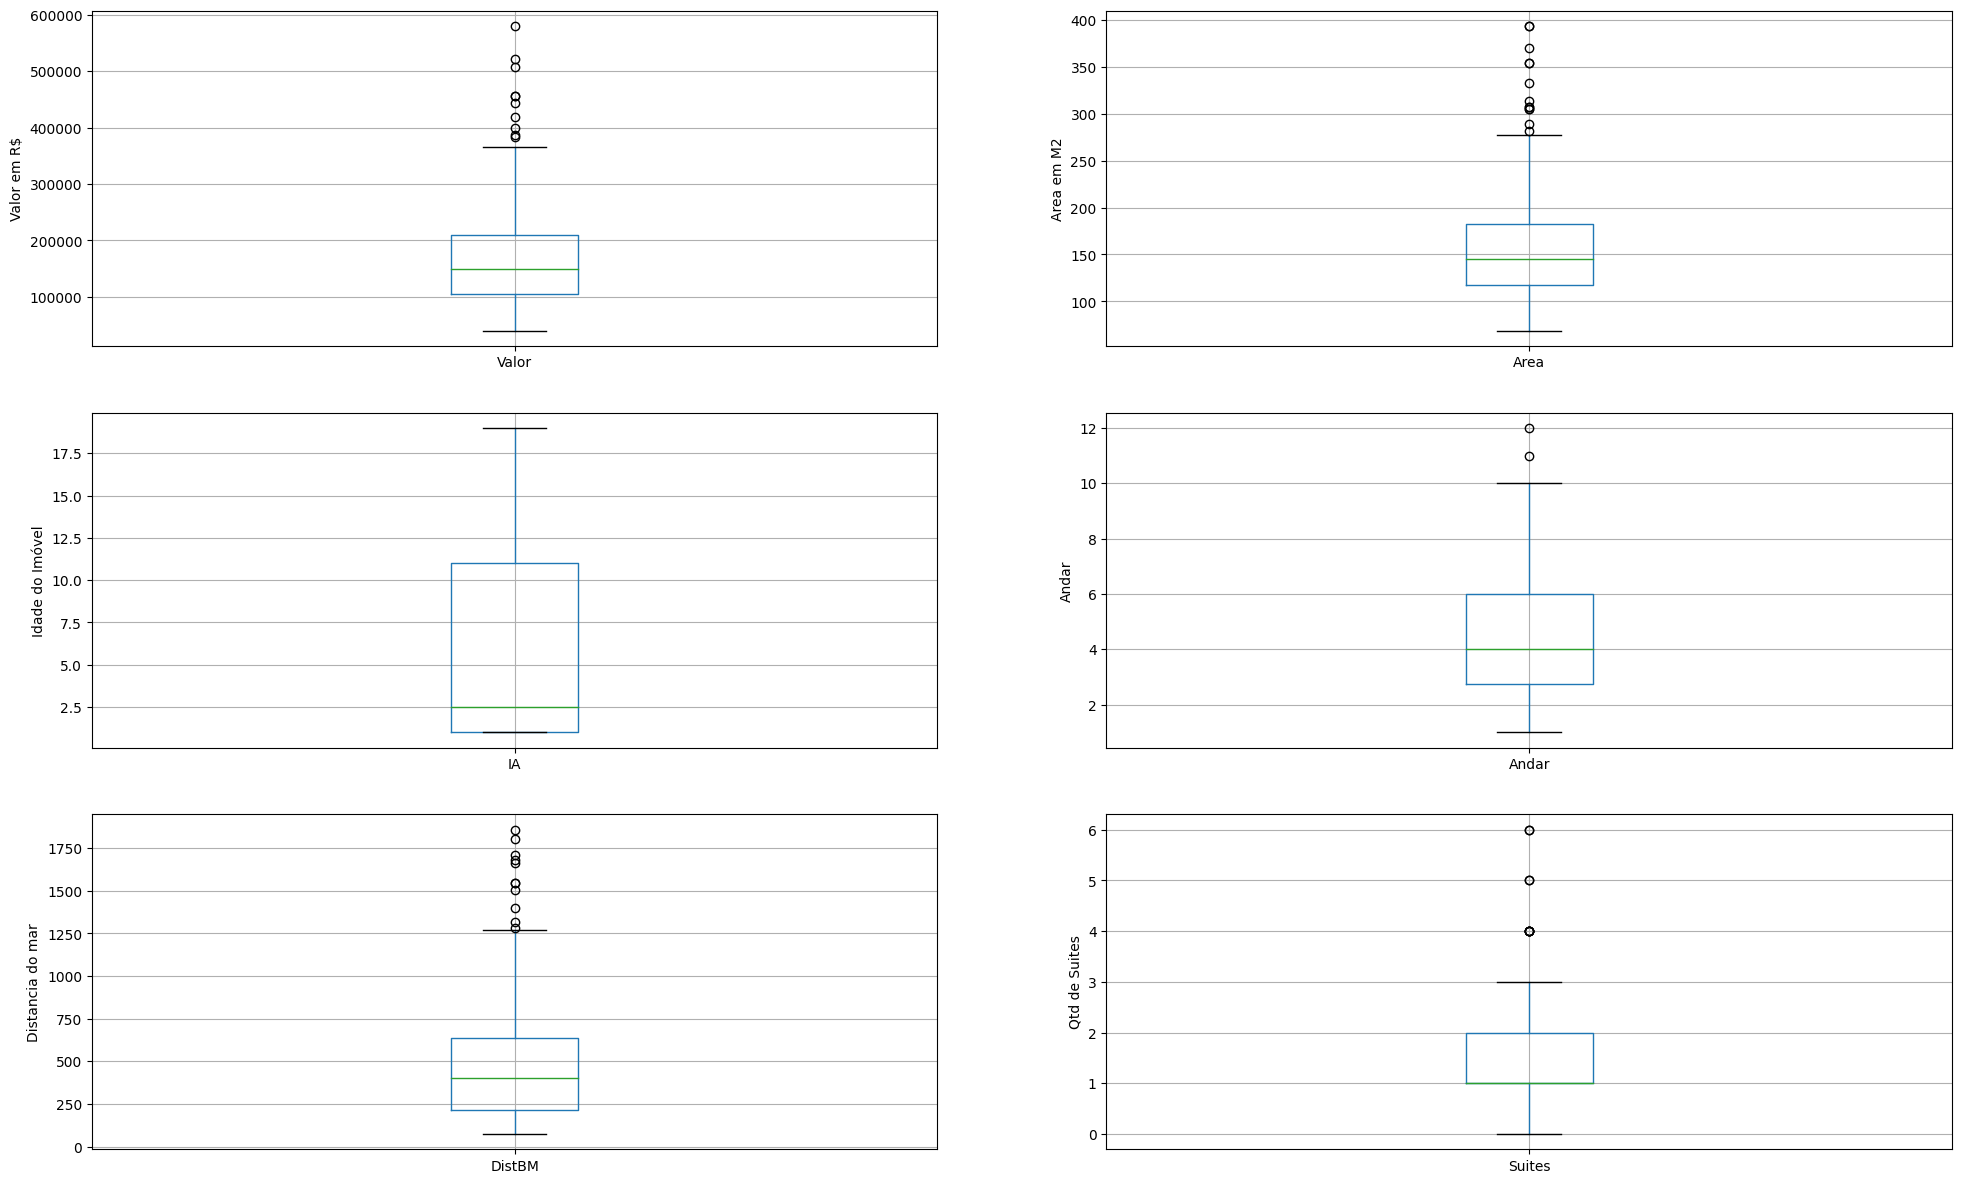

In [14]:
#Visualização das variaveis com Box Plot
plt.figure(figsize=(24,20))

plt.subplot(4,2,1) #os valores dos imoveis estão concentrados a maior parte entre 100 a 200 K
fig=df.boxplot(column ='Valor') # há presença de provaveis outiliers ou valores extremos na base até 600k
fig.set_title('')
fig.set_ylabel('Valor em R$')

plt.subplot(4,2,2)
fig=df.boxplot(column ='Area') # a area esta concentrada a maior parte entre 120 a 180m²
fig.set_title('')
fig.set_ylabel('Area em M2')

plt.subplot(4,2,3)
fig=df.boxplot(column ='IA') #A maior parte dos imoveis estão concentrados na idade de 2,5 ate 11 anos
fig.set_title('')
fig.set_ylabel('Idade do Imóvel')

plt.subplot(4,2,4)
fig=df.boxplot(column ='Andar')
fig.set_title('') # A mior parte dos imoveis concentram-se de 2 a 6 andares, oque nos leva a perceber que ha uma grande fatia de predios na base. Mas ha imoveis com 11 e 12 andares.
fig.set_ylabel('Andar')

plt.subplot(4,2,5)
fig=df.boxplot(column ='DistBM') # Grande parte concentrada dos imoveis estão a uma distancia de 250 a 600M do mar. Mas ha distancias maiores que vão de 1250 até 1750M do mar.
fig.set_title('')
fig.set_ylabel('Distancia do mar')

plt.subplot(4,2,6)
fig=df.boxplot(column ='Suites')
fig.set_title('') # grande parte do imovel concentra entre1 a 2 suites. Há lguns imoveis na base com 4,5 e 6 suites.
fig.set_ylabel('Qtd de Suites')

**Analisando correlações**

O coeficiente de correlação é um valor numérico que quantifica a correlação entre duas variáveis. Aqui usaremos a de pearson.

Correlação de Pearson - quando as variáveis são núméricas quantitativas


*   ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
*   ρ = 0,7 a 0,9 (positivo ou negativo): correlação forte;
*   ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
*   ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
*   ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.




<Axes: >

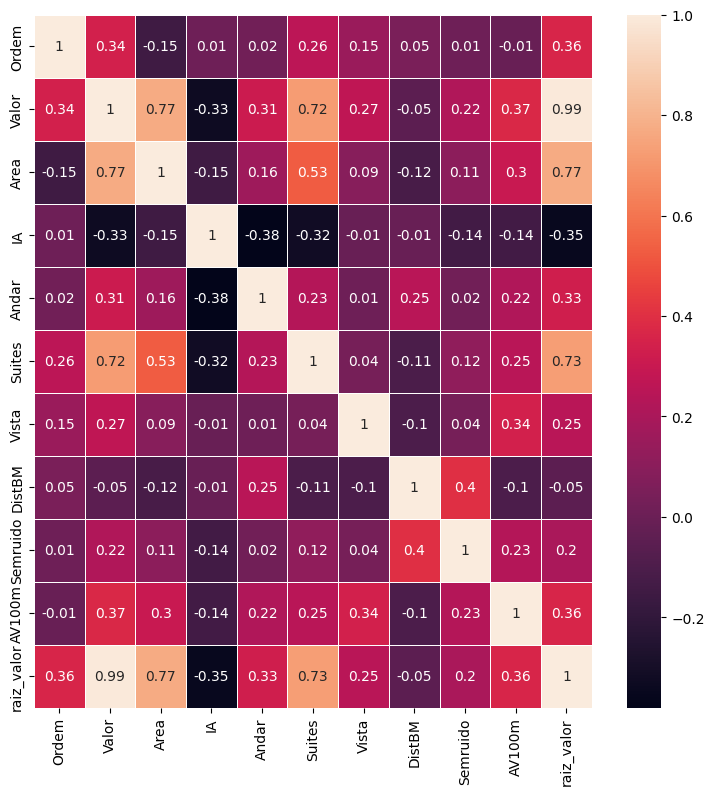

In [15]:
#Analise da correlação entre variaveis com Matriz de Correlação
correlation_matrix = df.corr().round(2)

fig, ax =plt.subplots(figsize = (9,9))
sb.heatmap(data= correlation_matrix, annot=True, linewidths=.5, ax=ax)

#Podemos perceber uma forte correlação entre as variaveis valor e àrea.

**Analisando as correlações entre as variáveis e a Target**

 Em uma análise descritiva sempre utilizar a variável Target conforme o objetivo do projeto.


Text(0.5, 1.0, ' Visualização Area do Imovel X Valor')

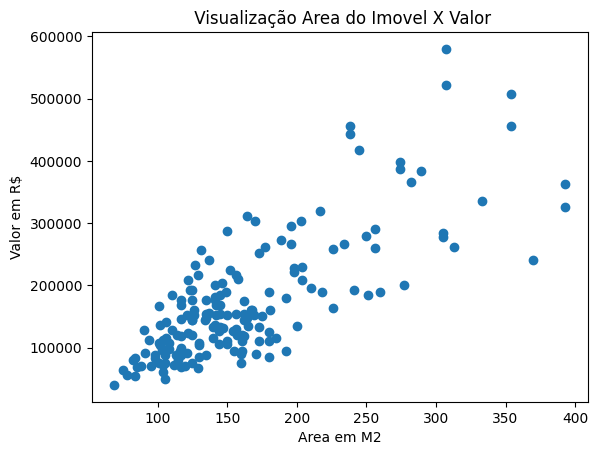

In [16]:
#Em uma análise descritiva sempre utilizar a variável Target - De acordo com o objetivo
# gráfico quando a variável preditora quantitativa

#Grafico de Dispersão ou Scaterplot
plt.scatter('Area', 'Valor',data=df)
plt.xlabel('Area em M2')
plt.ylabel('Valor em R$')
plt.title(" Visualização Area do Imovel X Valor")


Podemos verificar através do grafico que quanto maior o área do imovel maior o valor em média.

Text(0.5, 1.0, 'Idade do Imovel X Valor')

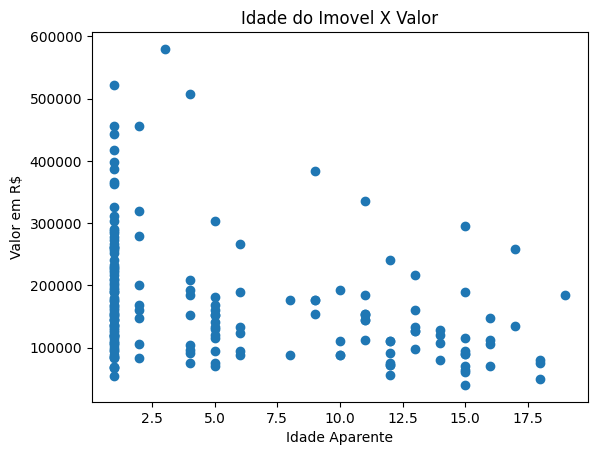

In [17]:
plt.scatter('IA', 'Valor',data=df)
plt.xlabel('Idade Aparente')
plt.ylabel('Valor em R$')
plt.title("Idade do Imovel X Valor")

Podemos perceber que imóveis mais recentes tem valor aumentado

**Analisando variáveis** **qualitativas**

<ipython-input-18-93df2edcbf16>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Vista', y='Valor', data=df, palette ='hls')


<Axes: xlabel='Vista', ylabel='Valor'>

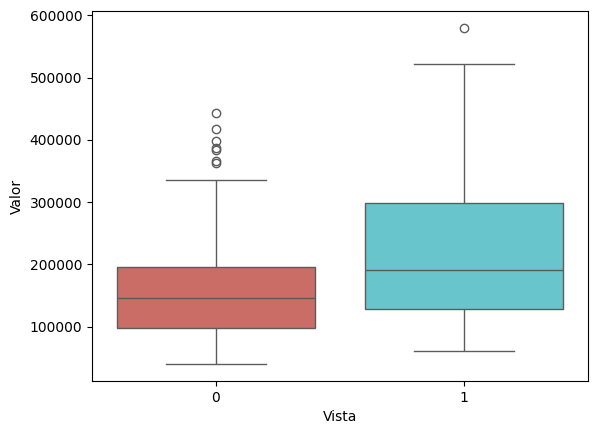

In [18]:
#Visualizando duas variaveis com boxplot
# Variáveis qualitativa com a variável Target
sb.boxplot(x='Vista', y='Valor', data=df, palette ='hls')

No gráfico boxplot acima demonstra que  os valores dos imoveis que possuem Vista Panorâmica são bem maiores.

<ipython-input-19-34a89bbb1ba9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='Semruido', y='Valor', data=df, palette ='hls')


<Axes: xlabel='Semruido', ylabel='Valor'>

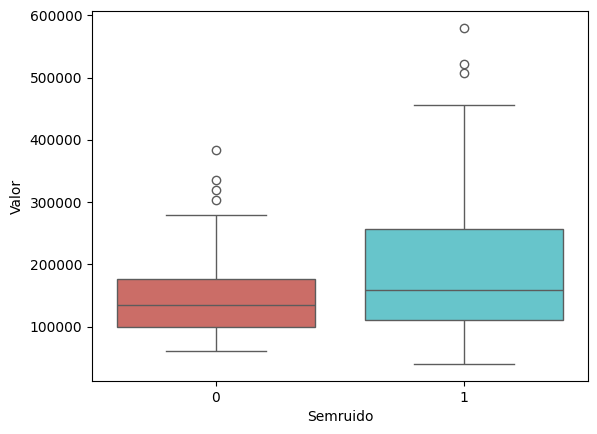

In [19]:
# Boxplot da variável Valor versus a variável Semruido
sb.boxplot(x='Semruido', y='Valor', data=df, palette ='hls')

No gráfico boxplot acima demonstra que os valores dos imoveis localizados em regiões tranquilas são bem maiores.

<ipython-input-20-4a0fe8c557fb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x='AV100m', y='Valor', data=df, palette ='hls')


<Axes: xlabel='AV100m', ylabel='Valor'>

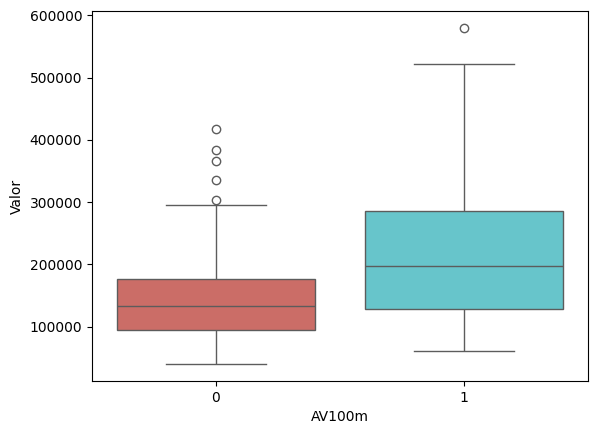

In [20]:
# Boxplot da variável Valor versus a variável AV100m
sb.boxplot(x='AV100m', y='Valor', data=df, palette ='hls')

No gráfico boxplot acima demonstra que os valores dos imoveis perto de areas verdes tem maior valorização.

**Aplicação do Modelo de Regressão Linear ou Linear Regression**

Biblioteca Sklearn https://scikit-learn.org/stable/

In [21]:
df.head()

,Ordem,Valor,Area,IA,Andar,Suites,Vista,DistBM,Semruido,AV100m,raiz_valor
0,1,160000,168,1,5,1,1,294,1,0,400.000000
1,2,67000,129,1,6,0,0,1505,1,0,258.843582
2,3,190000,218,1,8,1,0,251,0,1,435.889894
3,4,110000,180,12,4,1,0,245,0,0,331.662479
4,5,70000,120,15,3,1,0,956,1,0,264.575131


In [22]:
#Regressão Linear Multipla
from sklearn.linear_model import LinearRegression

#Criando um Objeto de Regressão linear
lr =LinearRegression()

In [23]:
# X contem as varáveis Preditoras ou Independentes
x = df[['Area','Suites','IA', 'Semruido', 'Vista', 'Andar', 'AV100m', 'DistBM']]

# Y contem variavel Target ou depentedente
y = df['Valor']


In [46]:
x # Conteudo das variaveis independentes

,Area,Suites,IA,Semruido,Vista,Andar,AV100m,DistBM
0,168,1,1,1,1,5,0,294
1,129,0,1,1,0,6,0,1505
2,218,1,1,0,0,8,1,251
3,180,1,12,0,0,4,0,245
4,120,1,15,1,0,3,0,956
...,...,...,...,...,...,...,...,...
167,82,0,14,1,0,2,0,485
168,134,0,11,1,1,2,1,827
169,135,2,9,1,1,3,1,414
170,141,2,1,0,0,6,0,305


In [25]:
y # Conteudo da variavel dependente ou alvo

0      160000
1       67000
2      190000
3      110000
4       70000
        ...  
167     80000
168    144000
169    176000
170    199956
171    144000
Name: Valor, Length: 172, dtype: int64

💪 Treinando o modelo com Linear Regression

In [26]:
from sklearn.model_selection import train_test_split #biblioteca para dividir os dados em treino e teste

In [27]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 101)

In [28]:
lr.fit(x_train, y_train) #Treinando o modelo com os dados de treino

LinearRegression()

**Predição**


Quando o modelo está treinado e validado, ele pode ser usado para fazer predições em novos dados (dados de teste ou dados futuros).

Uso da Função .predict: é **chamada com os novos dados como entrada,** e o modelo retorna as predições baseadas no que foi aprendido durante o treinamento.


In [29]:
# Calculando o valor predito da variavel na resposta da amostra teste / predito(variaveis independentes) - Preditora
y_pred = lr.predict(x_test)

**Intercepto**

È um dos parâmetros do modelo que representa o ponto onde a linha de regressão cruza o eixo Y. Ele é uma parte crucial da equação de regressão linear, pois define a posição da linha de regressão no gráfico de dados e garante que o modelo possa capturar a relação entre a variável dependente e a variável independente de maneira precisa.

In [30]:
# Primeiro: verificar o Intercepto e os Coeficientes da Regressão
#Em termos graficos o interceptor é o ponto onde a linha de regressão cruza o eixo vertical (eixo y)

print('Intercepto: ', lr.intercept_)

Intercepto:  -40165.87527729981


In [31]:
# Os coeficientes da Regressão Linear representam as inclinações da linha de regressão para cada variavel

coefficients = pd.concat([pd.DataFrame(x.columns), pd.DataFrame(np.transpose(lr.coef_))], axis=1)
coefficients

,0,0
0,Area,815.218075
1,Suites,34315.785459
2,IA,-1052.417100
3,Semruido,17027.508944
4,Vista,63486.030935
5,Andar,5635.237485
6,AV100m,-5672.535051
7,DistBM,-2.522530


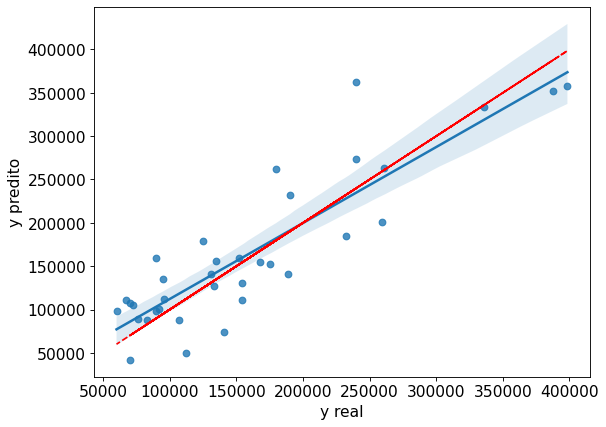

In [32]:
fig= plt.figure(figsize=(8,6), dpi=80)
plt.rcParams.update({'font.size':14})
ax = sb.regplot(x =y_test, y= y_pred)
ax.set(xlabel = 'y real', ylabel= 'y predito')
ax = plt.plot(y_test , y_test, '--r')

plt.show()


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #biblioteca para avaliar o modelo

In [34]:
# Avaliando o Modelo
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE', MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros
print('MSE', MSE) #Erro quadrático médio (MSE) é a média dos erros quadraticos
print( 'r2', r2) #(R-quadrado)

#Retorna valor 0 e 1 onde 1 representa uma precisão perfeita, ou seja toas as previsões estão corretas e 0 todas as previsões estão erradas.


MAE 34422.98857094584
MSE 1844288772.1790097
r2 0.7584591969125003


Observamos que o modelo de regressão linear se comportou bem, mas e se tentarmos criar um novo modelo sob um outro tipo de algoritmo diferente?



**Avaliando com Decision TreeRegression** 🌳
Também cohecido como Árvore de Decisão é outra técnica de aprendizado de máquina para realizar a Analise de Regressão. Ela funciona criando uma 'arvore'que divide a base de dados em conjuntos e sub-conjuntos menores usando as variaveis preditoras para prever uma variavel resposta continua.

Em cada nível da árvore(max_depth) serão geradas varias separaçoes nos atributos avaliados. Podendo ser ajustado para determinar a métrica da impureza que pode atrapalhar a inyterpretação.


Para avaliar o modelo:


*   Avaliar o coeficiente da r²
*   Realizar validação Cruzada
*   Avaliar importancia da variável ou ganho de informação GINI
*   Executar e avaliar os graficos de resíduo
*   comparação com outros modelos
*    se houve Overfiting ou Underfiting












In [36]:
from sklearn.tree import DecisionTreeRegressor #importando o modelo de DecisionTreeRegression

In [37]:
# Criando o modelo de DecisionTreeRegression
model_dtr = DecisionTreeRegressor(random_state=101, max_depth=10) #random_state: controla a aleatoriedade dos dados durante a distribuição
model_dtr.fit(x_train, y_train)  #max_depth: numero de divisões da árvore


DecisionTreeRegressor(max_depth=10, random_state=101)

In [38]:
y_pred_model_dtr =model_dtr.predict(x_test)

In [39]:
#Avaliando o Modelo
MAE = mean_absolute_error(y_test, y_pred_model_dtr)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
r2 = r2_score(y_test, y_pred_model_dtr)
print('MAE', MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros
print('MSE', MSE) #Erro quadrático médio (MSE) é a média dos erros quadraticos
print( 'r2', r2)#(R-quadrado)

#Retorna valor 0 e 1 onde 1 representa uma precisão perfeita, ou seja toas as previsões estão corretas e 0 todas as previsões estão erradas.

MAE 44913.75102040816
MSE 3223969337.3848395
r2 0.577766695417574


Vamos testar um outro tipo de algoritmo para analisar a performace, o **Support Vector Regression.** O **SVR**, é usado para tarefas de regressão, em que a tarefa é prever um valor contínuo em vez de uma classe.

**SVR**

Support Vector Regression também utilizado para tarefa de regressão. Seu objetivo é encontrar uma função que seja capaz de prever valores numéricos de uma variável de saída(informação que queremos prever) com base em um conjunto de variaveis de entrada. O modelo utiliza um conjunto de vetores de suporte para definir uma fronteira de decisão que separa as amostras em duas classes. Para minimizar a distancia entre as fronteiras de decisão e os pontos de dados.





Para avaliar o modelo de SVR:



*   Avaliar o coeficiente da r²
*  Realizar validação Cruzada

*   Metricas de desempenho :
Mean Absolute Error (MAE) é a média do valor absoluto dos erros.
Erro quadrático médio (MSE) é a média dos erros quadraticos
*   comparação com outros modelos
*  se houve Overfiting ou Underfiting









In [41]:
from sklearn.svm import SVR #importando o modelo de Support Vector Regression

In [42]:
#Criando modelo de SVM
svr = SVR(kernel= 'linear')

In [43]:
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [44]:
y_pred_svr = svr.predict(x_test)

In [45]:
#Avaliando o Modelo
MAE = mean_absolute_error(y_test, y_pred_svr)
MSE = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)
print('MAE', MAE) # Mean Absolute Error (MAE) é a média do valor absoluto dos erros
print('MSE', MSE) #Erro quadrático médio (MSE) é a média dos erros quadraticos
print( 'r2', r2)#(R-quadrado)

#Retorna valor 0 e 1 onde 1 representa uma precisão perfeita, ou seja toas as previsões estão corretas e 0 todas as previsões estão erradas.

MAE 43153.53918496288
MSE 3123421996.7782364
r2 0.5909350700044546


**Com basenos testes aplicados Regressão Linear, Árvore de decisão e SVR podemos concluir que o modelo de regressão linear performou melhor do que os demais modelo**


***Regressão Linear:***

MAE 34422.98857094584

MSE 1844288772.1790097

r2 0.7584591969125003 🤙 ✅





**Àrvore de Decisão**

MAE 44913.75102040816

MSE 3223969337.3848395

r2 0.577766695417574




**SVR**

MAE 43153.53918496288

MSE 3123421996.7782364

r2 0.5909350700044546



